In [1]:
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import median
import pandas as pd
import glob
import os
import nest_asyncio
# import gspread
nest_asyncio.apply()
from tardis_dev import datasets
from scipy.optimize import curve_fit

In [3]:
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier


In [262]:
datasets.download(
exchange="coinbase",
data_types=[
    "quotes"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["SHIB-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

datasets.download(
exchange="coinbase",
data_types=[
    "trades"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["SHIB-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

In [263]:
datasets.download(
exchange="coinbase",
data_types=[
    "book_snapshot_25"],
from_date = '2022-11-09',
to_date = '2022-11-10',
symbols = ["SHIB-USD"],
download_dir = r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD",
api_key= "TD.CTo-GFKD9yJojKmk.0fsYIehJ-wDD1e-.FVe4814H5x7BkM7.uRoxlXUJQmcdRPz.HWyzjjLu4LiqBi4.sF6W",
)

In [35]:
shibScaleFactor = 100000
quote_database = glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD", "coinbase_quotes*" + "2022-11-09_SHIB-USD.csv.gz"))
df_quotes = pd.concat((pd.read_csv(f) for f in quote_database), ignore_index=True)
df_quotes['timestamp'] = pd.to_datetime(df_quotes.timestamp * 1000)
df_quotes['ask_price'] =df_quotes['ask_price'] * shibScaleFactor
df_quotes['bid_price'] =df_quotes['bid_price'] * shibScaleFactor
df_quotes['ask_amount'] = df_quotes['ask_amount'] / shibScaleFactor
df_quotes['bid_amount'] = df_quotes['bid_amount'] / shibScaleFactor


df_quotes['midprice'] = (df_quotes['ask_price'] + df_quotes['bid_price'])/2

orderbook_database =  glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD", "coinbase_book_snapshot_25*" + "2022-11-09_SHIB-USD.csv.gz"))
df_orderbook = pd.concat((pd.read_csv(f) for f in orderbook_database), ignore_index=True)
df_orderbook['timestamp'] = pd.to_datetime(df_orderbook.timestamp * 1000)

trade_database = glob.glob(os.path.join(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase\SHIBUSD", "coinbase_trades*" + "2022-11-09_SHIB-USD.csv.gz"))
df_trades = pd.concat((pd.read_csv(f) for f in trade_database), ignore_index=True)
df_trades['timestamp'] = pd.to_datetime(df_trades.timestamp * 1000)
df_trades = df_trades[df_trades['timestamp'] >= df_quotes.loc[0, 'timestamp']]
df_trades.index = range(len(df_trades))

In [36]:
print(df_quotes)
df_quotes['spread'] = df_quotes.ask_price - df_quotes.bid_price
print(df_quotes['spread'].value_counts())
print(df_quotes['spread'].iloc[10])
print(df_quotes['spread'].iloc[18])

         exchange    symbol                  timestamp   local_timestamp  \
0        coinbase  SHIB-USD 2022-11-09 00:00:00.220234  1667952000220234   
1        coinbase  SHIB-USD 2022-11-09 00:00:00.239099  1667952000286435   
2        coinbase  SHIB-USD 2022-11-09 00:00:00.393293  1667952000438909   
3        coinbase  SHIB-USD 2022-11-09 00:00:00.476215  1667952000532423   
4        coinbase  SHIB-USD 2022-11-09 00:00:00.859530  1667952000902713   
...           ...       ...                        ...               ...   
1312790  coinbase  SHIB-USD 2022-11-09 23:59:59.343809  1668038399395271   
1312791  coinbase  SHIB-USD 2022-11-09 23:59:59.615553  1668038399665172   
1312792  coinbase  SHIB-USD 2022-11-09 23:59:59.776073  1668038399824221   
1312793  coinbase  SHIB-USD 2022-11-09 23:59:59.781411  1668038399830500   
1312794  coinbase  SHIB-USD 2022-11-09 23:59:59.790154  1668038399838577   

          ask_amount  ask_price  bid_price   bid_amount  midprice  
0        19761.6971

In [38]:
df_quotes.bid_price.value_counts()

1.005    23991
1.004    23953
1.003    22055
0.992    21760
0.994    21236
         ...  
0.886      210
1.030      167
0.828      112
0.829       62
0.827       40
Name: bid_price, Length: 204, dtype: int64

In [39]:
df_trades = df_trades[0:1000]
df_trades.index = range(len(df_trades))

In [40]:
df_trades

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
0,coinbase,SHIB-USD,2022-11-09 00:00:00.944378,1667952000987659,91253468,sell,0.00001,268652508
1,coinbase,SHIB-USD,2022-11-09 00:00:01.081862,1667952001133649,91253469,sell,0.00001,2140521
2,coinbase,SHIB-USD,2022-11-09 00:00:01.431148,1667952001488783,91253470,sell,0.00001,195709
3,coinbase,SHIB-USD,2022-11-09 00:00:02.101384,1667952002152198,91253471,sell,0.00001,4679644
4,coinbase,SHIB-USD,2022-11-09 00:00:03.480983,1667952003527648,91253472,sell,0.00001,4945919
...,...,...,...,...,...,...,...,...
995,coinbase,SHIB-USD,2022-11-09 00:13:22.505011,1667952802551205,91254463,buy,0.00001,2000000
996,coinbase,SHIB-USD,2022-11-09 00:13:23.644286,1667952803696061,91254464,buy,0.00001,2748521
997,coinbase,SHIB-USD,2022-11-09 00:13:24.632833,1667952804680817,91254465,sell,0.00001,132264000
998,coinbase,SHIB-USD,2022-11-09 00:13:26.597956,1667952806641542,91254466,sell,0.00001,59019257


In [41]:
#max_spread = max(df_quotes.spread)
max_spread, min_spread = max(df_quotes.spread), min(df_quotes.spread)
gamma = 1
max_kappa, min_kappa = gamma / (np.exp(gamma * min_spread * 0.5) - 1), gamma / (np.exp(gamma * max_spread * 0.5) - 1)
print('Max spread: {},\ngamma: {},\nmax_kappa: {}.'.format(max_spread, gamma, max_kappa))
print('Min spread: {},\nmin_kappa: {}.'.format(min_spread, min_kappa))

Max spread: 0.009000000000000008,
gamma: 1,
max_kappa: 1999.5000416670134.
Min spread: 0.0009999999999998899,
min_kappa: 221.72259722209813.


In [42]:
def curve_fit_manual(x, y, alpha, kappa):
    def residuals(params):
        a = params[0]
        b = params[1]
        
        sum = 0
        for i in range(len(x)):
            sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
        return sum
    
    learning_rate = 0.01
    precision = 0.001
    
    a = alpha
    b = kappa
    da = 1
    db = 1
    
    time_start = datetime.datetime.now()
    
    while abs(da) > precision or abs(db) > precision:
        da = (residuals([a + precision, b]) - residuals([a, b])) / precision
        db = (residuals([a, b + precision]) - residuals([a, b])) / precision
        
        a -= learning_rate * da
        b -= learning_rate * db
        
        now = datetime.datetime.now()
        
        if (now - time_start).seconds > 1: 
            a = 0 
            b = 0
            
            break
            
        
    if a < 0: 
        a = 0 
    if b < 0: 
        b = 0
    
    return a, b

In [43]:
start_timestamp = df_quotes.loc[0, 'timestamp']

alpha, kappa = 0, 0
prev_alpha, prev_kappa = 0,0

#min_kappa = 100
min_alpha = 200 #avoid dividing by 0 in the guant optimal bid ask

max_alpha = 50000000
#max_kappa = 1/(math.e**(max_spread / 2) - 1)

alphas, kappas = [], []
sampling_length = 30

for i in range(len(df_trades) - (sampling_length+30)):
    trade_samples = {}
    
    current_trade_sample = df_trades.loc[i:i+sampling_length+30][['timestamp', 'price', 'amount']]
    current_trade_sample.index = range(len(current_trade_sample))
    
    current_quote_sample = df_quotes[(df_quotes['timestamp'] >= start_timestamp) & 
                                    (df_quotes['timestamp'] < current_trade_sample.loc[len(current_trade_sample)-1, 'timestamp'])]
    
    #get price levels for each trade
    for j in range(len(current_trade_sample)):
        
        last_quote_df = df_quotes[df_quotes['timestamp'] < current_trade_sample.loc[j, 'timestamp']]
        last_quote_df.index = range(len(last_quote_df))
        
        #Get last quote price & timestamp
        last_quote_price = last_quote_df.loc[len(last_quote_df)-1, 'midprice']
        last_quote_timestamp = current_trade_sample.loc[j, 'timestamp']
        
        #last_quote_timestamp = last_quote_df.loc[len(last_quote_df)-1, 'timestamp']
        
        trade = {"price_level": round((abs(current_trade_sample.loc[j, 'price'] - float(last_quote_price))), 10), 
                 "amount": current_trade_sample.loc[j, 'amount']}
        
        if last_quote_timestamp not in trade_samples.keys():
            trade_samples[last_quote_timestamp] = []
        
        trade_samples[last_quote_timestamp] += [trade]
    

    if len(trade_samples.keys()) > sampling_length:
        timestamps = list(trade_samples.keys())
        timestamps.sort()
        timestamps = timestamps[:sampling_length]

        trade_samples_new = {}
        
        for timestamp in timestamps:
            trade_samples_new[timestamp] = trade_samples[timestamp]
            
        trade_samples = trade_samples_new
    
    ##We now have last 30 trades with price levels for each i
    
    # Calculate lambdas / trading intensities
    lambdas = []
    trades_consolidated = {} 
    price_levels = []

    for timestamp in trade_samples.keys():
        tick = trade_samples[timestamp]

        for trade in tick: 
            if trade['price_level'] not in trades_consolidated.keys():
                trades_consolidated[trade['price_level']] = 0
                price_levels += [trade['price_level']] 
            
            trades_consolidated[trade['price_level']] += trade['amount']
    
    #UPDATE LAMBDAS
    for price_level in price_levels:
        lambdas += [trades_consolidated[price_level]]
        
    for price_level in trades_consolidated.copy():
        if trades_consolidated[price_level] < 100:
            del trades_consolidated[price_level]

    # Adjust to be able to calculate log
    lambdas_adj = [10**-10 if x==0 else x for x in lambdas]

    price_levels.sort()
    
    ##First assign previous alpha & kappa 
    alpha_fit, kappa_fit = curve_fit_manual(price_levels, lambdas_adj, 0, 0)
    
    alpha = max(min(max_alpha, alpha_fit), min_alpha)
    kappa = max(min(max_kappa, kappa_fit), min_kappa)
    
    alphas.append(alpha)
    kappas.append(kappa)
    
    if len(alphas) > 1:
        prev_alpha = alphas[-2]
        prev_kappa = kappas[-2]
    
    if (alpha == 0) and (prev_alpha != 0) and len(alphas) > 1: 
        alphas[-1] = prev_alpha
        alpha = 0
        
    if (kappa == 0) and (prev_kappa != 0) and len(kappas) > 1:
        kappas[-1] = prev_kappa
        kappa = 0
        
    if i % 1 == 0:
        print("Calculating ({}".format(np.round(100 * i / (len(df_trades) - (sampling_length+30)), 4)) + """%)""", end='\r')
    
    #Update start timestamp
    start_timestamp = current_trade_sample.loc[0, 'timestamp'] 

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppDat

C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:8: RuntimeWarning: overflow encountered in exp
  sum += (y[i] - (a * np.exp(-b * x[i]))) ** 2
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:22: RuntimeWarning: invalid value encountered in double_scalars
  da = (residuals([a + precision, b]) - residuals([a, b])) / precision
C:\Users\Temp_Student_001\AppData\Local\Temp\ipykernel_23704\1130115257.py:23: RuntimeWarning: invalid value encountered in double_scalars
  db = (residuals([a, b + precision]) - residuals([a, b])) / precision


In [44]:
print(kappas)
price_levels

[1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134,

[1.01448985, 1.01448986, 1.01498986, 1.01548985, 1.01548986]

In [45]:
lambdas_adj

[703834597, 71824810, 545893345, 202332944, 825921274]

In [46]:
trades_consolidated

{1.01448985: 703834597,
 1.01448986: 71824810,
 1.01548985: 545893345,
 1.01548986: 202332944,
 1.01498986: 825921274}

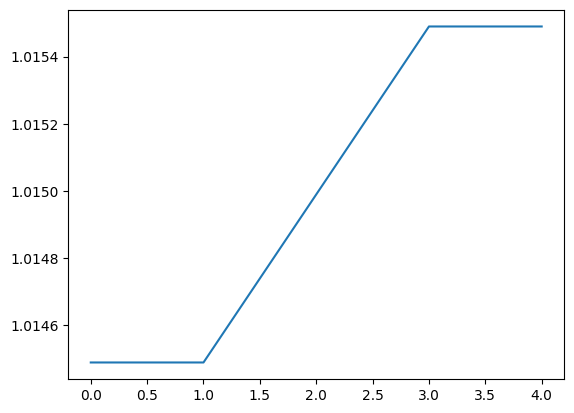

In [47]:
plt.plot(price_levels)

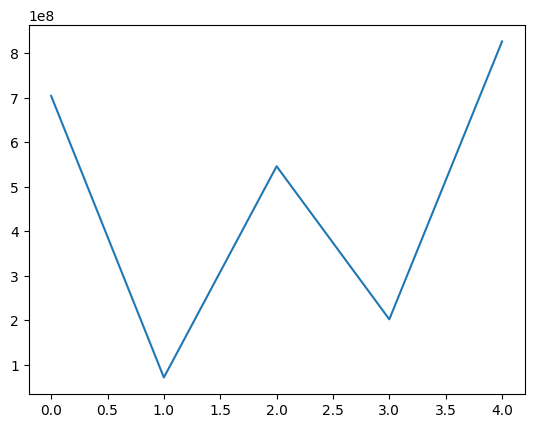

In [48]:
plt.plot(lambdas_adj)

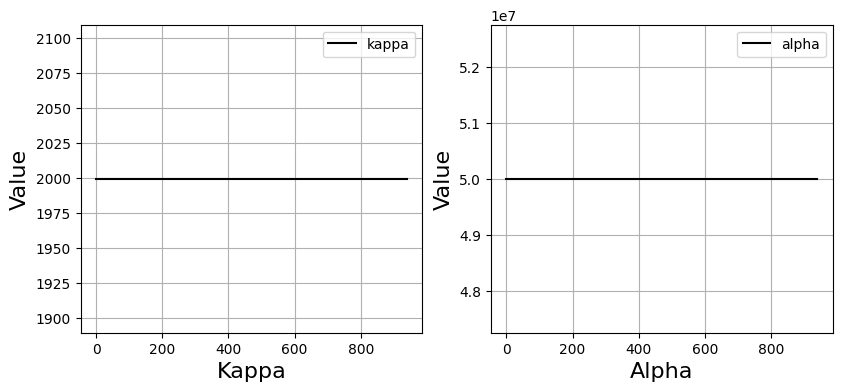

In [49]:
f = plt.figure(figsize=(15, 4))
f.add_subplot(1, 3, 1)
plt.plot(kappas, color='black', label='kappa')
plt.xlabel('Kappa', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 2)
plt.plot(alphas, color='black', label='alpha')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True)
plt.legend()

In [16]:
def optimal_spread_stoikov(gamma, kappa):
    spread = (2/gamma)*math.log(1+ (gamma/kappa)) 
    return spread

def gueant_optimal_bids_asks(gamma, kappa, Q, alpha, sigma):
    coef = math.sqrt(((sigma**2 * gamma)/(2*kappa*alpha))*(1+(gamma/kappa))**(1+(kappa/gamma)))
    
    optimal_bid = (1/gamma)*math.log(1+(gamma/kappa)) + (1/2)*(2*Q +1)*coef
    
    optimal_ask = (1/gamma)*math.log(1+(gamma/kappa)) - (1/2)*(-2*Q - 1)*coef
    
    return optimal_bid + optimal_ask

In [17]:
for i in range(len(kappas)):
    if kappas[i] > 0:
        index_pos = i 
        break

In [18]:
index_pos

0

In [19]:
first_x_greeks = df_trades[30+index_pos:30+len(kappas)]['timestamp']
first_x_greeks.index = range(len(first_x_greeks))
first_x_greeks

0     2022-11-09 00:00:16.653037
1     2022-11-09 00:00:16.653308
2     2022-11-09 00:00:16.653308
3     2022-11-09 00:00:16.653781
4     2022-11-09 00:00:16.658081
                 ...            
935   2022-11-09 00:12:49.479420
936   2022-11-09 00:12:49.479420
937   2022-11-09 00:12:49.486678
938   2022-11-09 00:12:49.504989
939   2022-11-09 00:12:52.212561
Name: timestamp, Length: 940, dtype: datetime64[ns]

In [20]:
market_spread = []
level_5_spread = []
level_15_spread = []
level_20_spread = []

for i in range(len(first_x_greeks)):
    df_example = df_orderbook[df_orderbook['timestamp'] <= first_x_greeks[i]]
    idx = len(df_example) - 1
    
    spread_1 = df_example.loc[idx, 'asks[0].price'] - df_example.loc[idx, 'bids[0].price']
    market_spread.append(spread_1)
    
    spread_2 = df_example.loc[idx, 'asks[5].price'] - df_example.loc[idx, 'bids[5].price']
    level_5_spread.append(spread_2)
    
    spread_3 = df_example.loc[idx, 'asks[15].price'] - df_example.loc[idx, 'bids[15].price']
    level_15_spread.append(spread_3)

In [357]:
spreads_stoikov_1, spreads_stoikov_2, spreads_stoikov_3 = [], [], []
spreads_gueant_1, spreads_gueant_2, spreads_gueant_3 = [], [], []

gamma_1 = 0.01
gamma_2 = 0.1
gamma_3 = 0.99

print(kappas)

for i in range(len(first_x_greeks)):
    spread_stoikov_1 = optimal_spread_stoikov(gamma_1/market_spread[i], kappas[i+index_pos])
    spread_gueant_1 = gueant_optimal_bids_asks(gamma_1/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_1.append(spread_stoikov_1)
    spreads_gueant_1.append(spread_gueant_1)
    
    spread_stoikov_2 = optimal_spread_stoikov(gamma_2/market_spread[i], kappas[i+index_pos])
    spread_gueant_2 = gueant_optimal_bids_asks(gamma_2/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_2.append(spread_stoikov_2)
    spreads_gueant_2.append(spread_gueant_2)
    
    spread_stoikov_3 = optimal_spread_stoikov(gamma_3/market_spread[i], kappas[i+index_pos])
    spread_gueant_3 = gueant_optimal_bids_asks(gamma_3/market_spread[i], kappas[i+index_pos], 0, alphas[i], 0.0002)
    
    spreads_stoikov_3.append(spread_stoikov_3)
    spreads_gueant_3.append(spread_gueant_3)

[221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 221.72259722209813, 221.72259722209813, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 221.72259722209813, 1999.5000416670134, 1999.5000416670134, 221.72259722209813, 1999.5000416670134, 1999.5000416670134, 1999.5000416670134, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813, 221.72259722209813,

In [358]:
spreads_stoikov_4, spreads_stoikov_5, spreads_stoikov_6 = [], [], []

gamma_1 = 0.01
gamma_2 = 0.1
gamma_3 = 0.99

for i in range(len(first_x_greeks) - 7):
    spread_stoikov_4 = optimal_spread_stoikov(gamma_1, kappas[i+index_pos])
    spreads_stoikov_4.append(spread_stoikov_4)
    
    spread_stoikov_5 = optimal_spread_stoikov(gamma_2, kappas[i+index_pos])
    spreads_stoikov_5.append(spread_stoikov_5)
    
    spread_stoikov_6 = optimal_spread_stoikov(gamma_3, kappas[i+index_pos])
    spreads_stoikov_6.append(spread_stoikov_6)

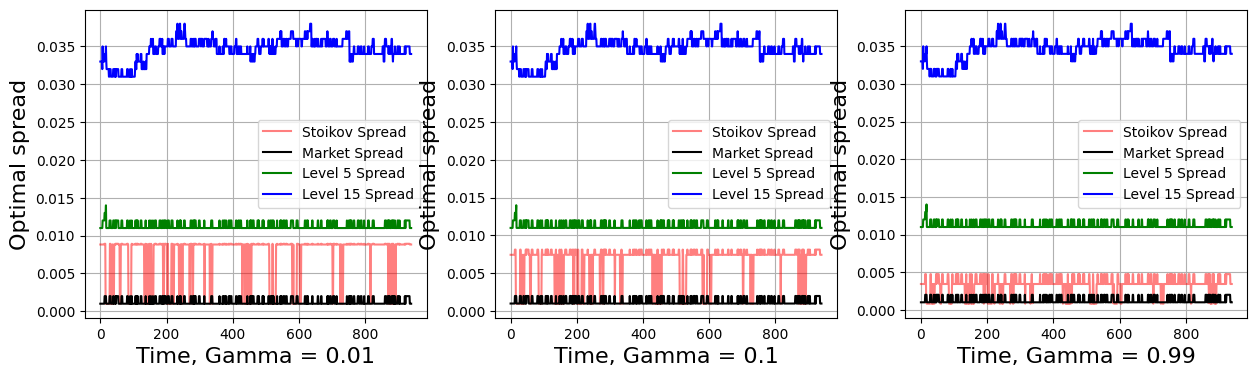

In [359]:
f = plt.figure(figsize=(15, 4))
f.add_subplot(1, 3, 1)
plt.plot(np.arange(0,len(spreads_stoikov_1),1), spreads_stoikov_1, color='red', label= 'Stoikov Spread', alpha = 0.5  )
#plt.plot(np.arange(0,len(spreads_stoikov_4),1), spreads_stoikov_4, color='blue', label= 'Stoikov Spread nd', alpha = 0.5  )
plt.plot(np.arange(0,len(market_spread),1), market_spread, color ='black', label= 'Market Spread' )
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_1), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 2)
plt.plot(np.arange(0,len(spreads_stoikov_2),1), spreads_stoikov_2, color='red', label= 'Stoikov Spread', alpha = 0.5 )
#plt.plot(np.arange(0,len(spreads_stoikov_5),1), spreads_stoikov_5, color='blue', label= 'Stoikov Spread nd', alpha = 0.5 )
plt.plot(np.arange(0,len(market_spread),1), market_spread, color ='black', label= 'Market Spread' )
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_2), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

f.add_subplot(1, 3, 3)
plt.plot(np.arange(0,len(spreads_stoikov_3), 1), spreads_stoikov_3, color='red', label= 'Stoikov Spread', alpha = 0.5 )
#plt.plot(np.arange(0,len(spreads_stoikov_6), 1), spreads_stoikov_6, color='blue', label= 'Stoikov Spread nd', alpha = 0.5 )
plt.plot(np.arange(0,len(market_spread), 1), market_spread, color ='black', label= 'Market Spread')
plt.plot(np.arange(0,len(level_5_spread),1), level_5_spread, color ='green', label= 'Level 5 Spread')
plt.plot(np.arange(0,len(level_15_spread),1), level_15_spread, color ='blue', label= 'Level 15 Spread')
plt.xlabel('Time, Gamma = {}'.format(gamma_3), fontsize=16)
plt.ylabel('Optimal spread', fontsize=16)
plt.grid(True)
plt.legend()

plt.savefig(r"C:\Users\Temp_Student_001\Desktop\research\0.projects\Ariyan\Dataset Coinbase SHIB TEST2")